# Linear Regression for CO2 Emission Prediction

This notebook performs linear regression to predict CO2 emissions based on vehicle characteristics and fuel consumption data.

## Dataset: fuel_consumption_dataset.csv
- **Target Variable**: CO2EMISSIONS
- **Features**: Engine size, cylinders, fuel consumption metrics, etc.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# Load the dataset
df = pd.read_csv('fuel_consumption_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (1067, 13)

First 5 rows:
   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                      

In [3]:
# Data preprocessing and exploration
print("Missing values:")
print(df.isnull().sum())

# Check for any non-numeric columns that need encoding
print("\nData types:")
print(df.dtypes)

# Display unique values for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} unique values: {df[col].nunique()}")
    if df[col].nunique() < 10:
        print(f"Values: {df[col].unique()}")

Missing values:
MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

Data types:
MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

Categorical columns: ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']

M

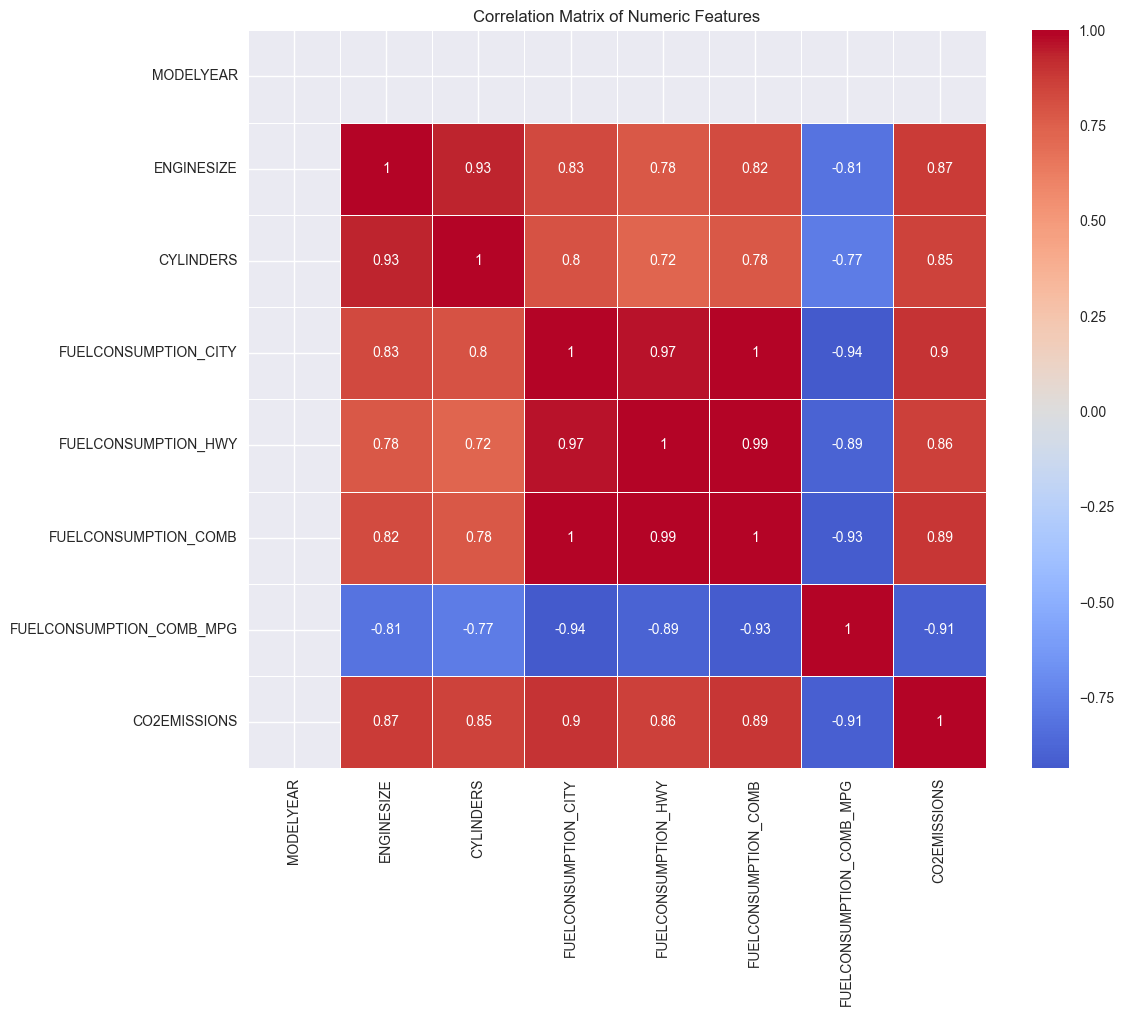


Correlation with CO2EMISSIONS:
CO2EMISSIONS                1.000000
FUELCONSUMPTION_CITY        0.898039
FUELCONSUMPTION_COMB        0.892129
ENGINESIZE                  0.874154
FUELCONSUMPTION_HWY         0.861748
CYLINDERS                   0.849685
FUELCONSUMPTION_COMB_MPG   -0.906394
MODELYEAR                        NaN
Name: CO2EMISSIONS, dtype: float64


In [4]:
# Correlation analysis
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# Show correlation with target variable (CO2EMISSIONS)
print("\nCorrelation with CO2EMISSIONS:")
co2_corr = correlation_matrix['CO2EMISSIONS'].sort_values(ascending=False)
print(co2_corr)

In [5]:
# Feature selection and preparation
# Select relevant numeric features for the model
feature_columns = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 
                   'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']

# Prepare features and target
X = df[feature_columns]
y = df['CO2EMISSIONS']

print(f"Features selected: {feature_columns}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Check for any missing values in selected features
print(f"\nMissing values in features:")
print(X.isnull().sum())
print(f"Missing values in target: {y.isnull().sum()}")

Features selected: ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
Feature matrix shape: (1067, 5)
Target vector shape: (1067,)

Missing values in features:
ENGINESIZE              0
CYLINDERS               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
dtype: int64
Missing values in target: 0


In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 853 samples
Testing set size: 214 samples


In [7]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Model training completed!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model training completed!
Model coefficients: [11.24245948  7.01602813 -8.28459694 -7.5814794  25.26626471]
Model intercept: 67.68380014859778


In [8]:
# Model evaluation - Performance metrics
def evaluate_model(y_true, y_pred, dataset_name):
    """Calculate and display model performance metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    
    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

# Evaluate on both training and testing sets
train_metrics = evaluate_model(y_train, y_train_pred, "Training")
test_metrics = evaluate_model(y_test, y_test_pred, "Testing")


Training Set Performance:
R² Score: 0.8607
Mean Squared Error (MSE): 553.9881
Root Mean Squared Error (RMSE): 23.5370
Mean Absolute Error (MAE): 16.9760

Testing Set Performance:
R² Score: 0.8763
Mean Squared Error (MSE): 511.3652
Root Mean Squared Error (RMSE): 22.6134
Mean Absolute Error (MAE): 16.6897



Feature Importance (based on coefficients):
                Feature  Coefficient  Abs_Coefficient
4  FUELCONSUMPTION_COMB    25.266265        25.266265
0            ENGINESIZE    11.242459        11.242459
2  FUELCONSUMPTION_CITY    -8.284597         8.284597
3   FUELCONSUMPTION_HWY    -7.581479         7.581479
1             CYLINDERS     7.016028         7.016028


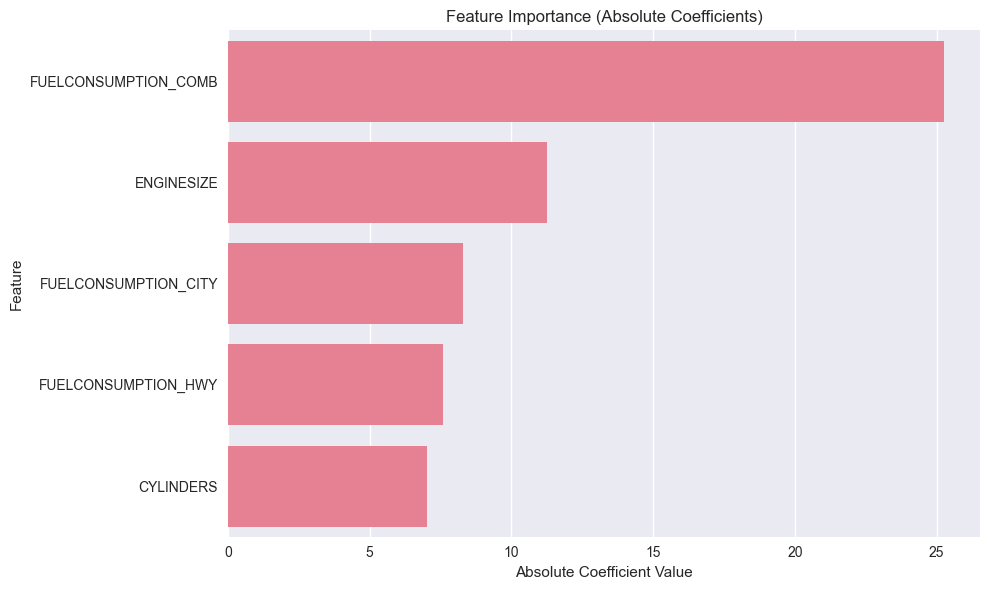

In [9]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (based on coefficients):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Abs_Coefficient', y='Feature')
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

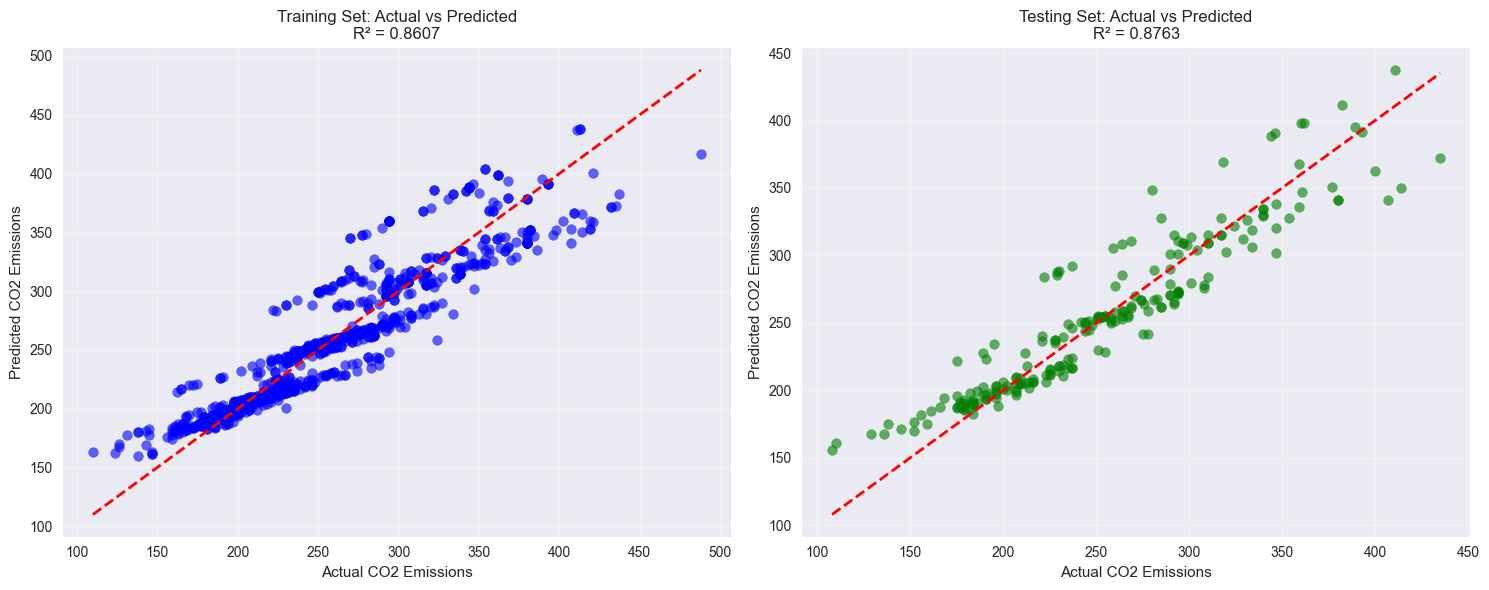

In [10]:
# Visualization: Actual vs Predicted values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set plot
axes[0].scatter(y_train, y_train_pred, alpha=0.6, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual CO2 Emissions')
axes[0].set_ylabel('Predicted CO2 Emissions')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_metrics["R2"]:.4f}')
axes[0].grid(True, alpha=0.3)

# Testing set plot
axes[1].scatter(y_test, y_test_pred, alpha=0.6, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual CO2 Emissions')
axes[1].set_ylabel('Predicted CO2 Emissions')
axes[1].set_title(f'Testing Set: Actual vs Predicted\nR² = {test_metrics["R2"]:.4f}')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

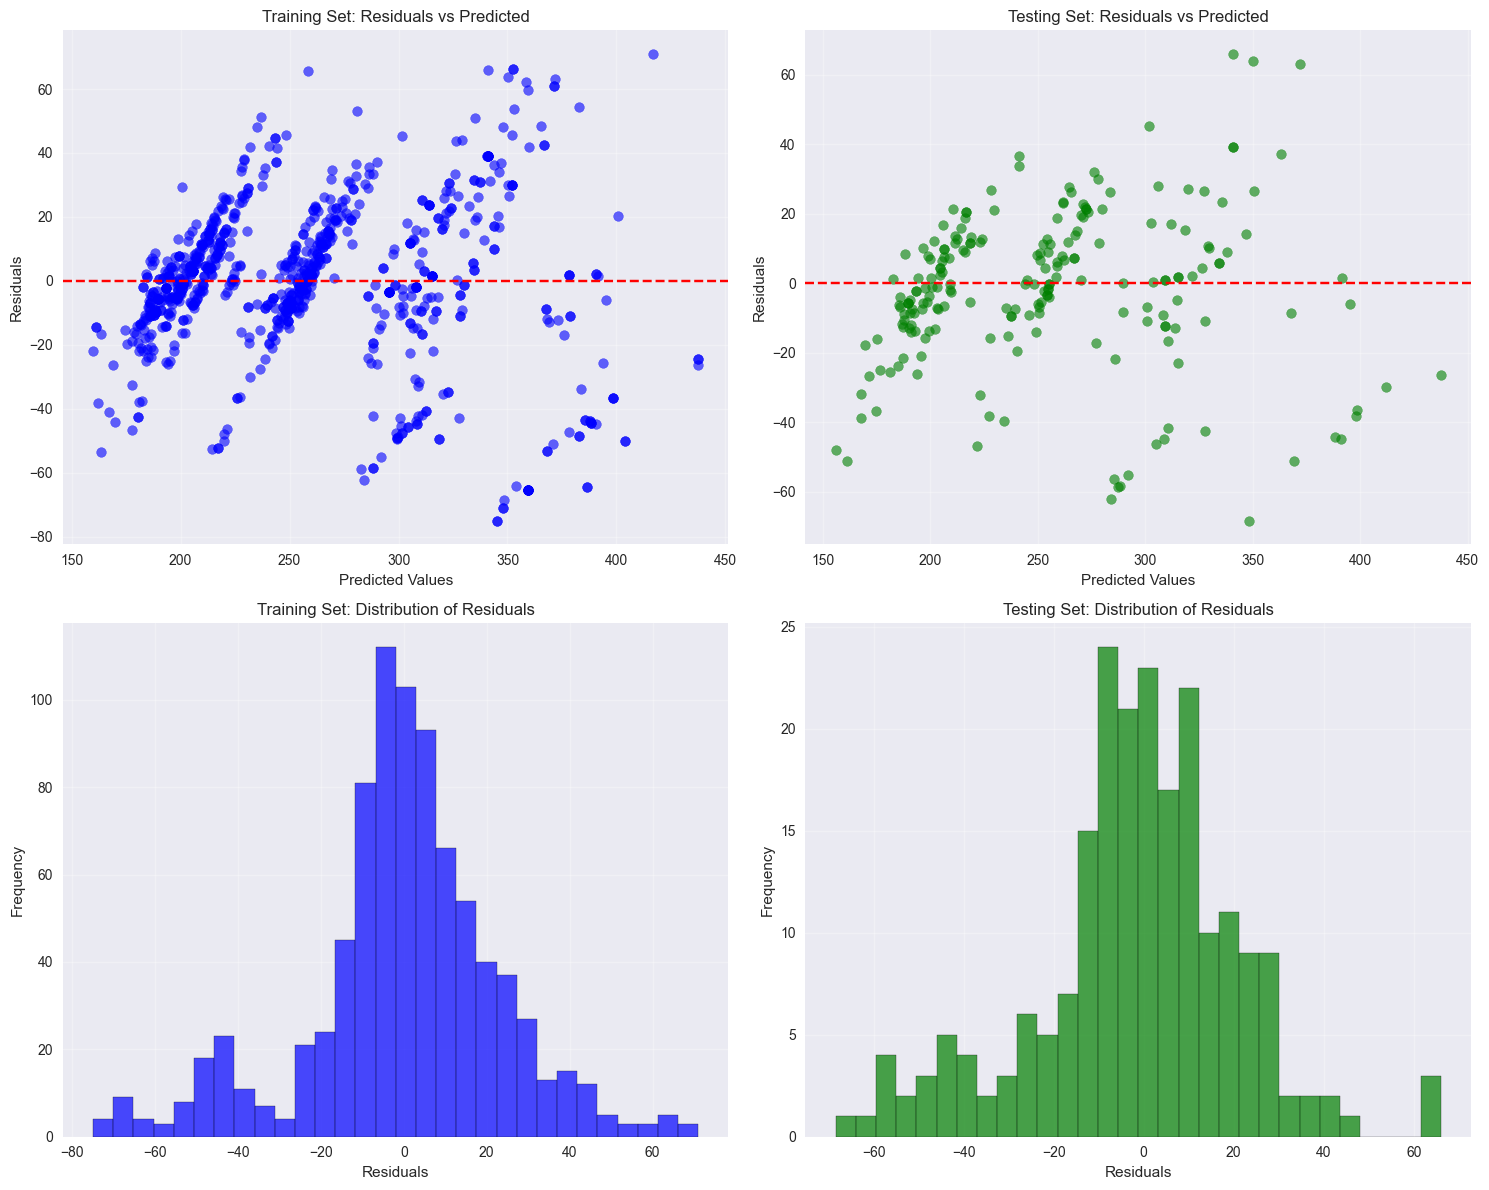

In [11]:
# Residual analysis
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Residuals vs Predicted (Training)
axes[0, 0].scatter(y_train_pred, train_residuals, alpha=0.6, color='blue')
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Training Set: Residuals vs Predicted')
axes[0, 0].grid(True, alpha=0.3)

# Residuals vs Predicted (Testing)
axes[0, 1].scatter(y_test_pred, test_residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title('Testing Set: Residuals vs Predicted')
axes[0, 1].grid(True, alpha=0.3)

# Histogram of residuals (Training)
axes[1, 0].hist(train_residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Training Set: Distribution of Residuals')
axes[1, 0].grid(True, alpha=0.3)

# Histogram of residuals (Testing)
axes[1, 1].hist(test_residuals, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Testing Set: Distribution of Residuals')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Model summary and conclusions
print("\n" + "="*60)
print("LINEAR REGRESSION MODEL SUMMARY")
print("="*60)

print(f"\nDataset: fuel_consumption_dataset.csv")
print(f"Total samples: {len(df)}")
print(f"Features used: {', '.join(feature_columns)}")
print(f"Target variable: CO2EMISSIONS")

print(f"\nModel Performance:")
print(f"Training R² Score: {train_metrics['R2']:.4f}")
print(f"Testing R² Score: {test_metrics['R2']:.4f}")
print(f"Testing RMSE: {test_metrics['RMSE']:.2f}")

# Model interpretation
if test_metrics['R2'] > 0.8:
    performance = "Excellent"
elif test_metrics['R2'] > 0.6:
    performance = "Good"
elif test_metrics['R2'] > 0.4:
    performance = "Moderate"
else:
    performance = "Poor"

print(f"\nModel Quality: {performance} (R² = {test_metrics['R2']:.4f})")

print(f"\nMost Important Features:")
for i, row in feature_importance.head(3).iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

print("\nModel Equation:")
equation = f"CO2_Emissions = {model.intercept_:.2f}"
for feature, coef in zip(feature_columns, model.coef_):
    equation += f" + ({coef:.4f} × {feature})"
print(equation)


LINEAR REGRESSION MODEL SUMMARY

Dataset: fuel_consumption_dataset.csv
Total samples: 1067
Features used: ENGINESIZE, CYLINDERS, FUELCONSUMPTION_CITY, FUELCONSUMPTION_HWY, FUELCONSUMPTION_COMB
Target variable: CO2EMISSIONS

Model Performance:
Training R² Score: 0.8607
Testing R² Score: 0.8763
Testing RMSE: 22.61

Model Quality: Excellent (R² = 0.8763)

Most Important Features:
  FUELCONSUMPTION_COMB: 25.2663
  ENGINESIZE: 11.2425
  FUELCONSUMPTION_CITY: -8.2846

Model Equation:
CO2_Emissions = 67.68 + (11.2425 × ENGINESIZE) + (7.0160 × CYLINDERS) + (-8.2846 × FUELCONSUMPTION_CITY) + (-7.5815 × FUELCONSUMPTION_HWY) + (25.2663 × FUELCONSUMPTION_COMB)
